In [20]:
import numpy as np
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
topic_df = pd.read_pickle('gdrive/MyDrive/mathesis/df_topic_2018.pkl')

In [4]:
sent_df = topic_df[(topic_df['person_id'].notnull()) & (topic_df['Topic'] > 0)][['window_id', 'sentences_window']].reset_index(drop=True)

In [5]:
sent_df

,window_id,sentences_window
0,45,Ausgangspunkt dieser Vorlage war das Gefühl de...
1,52,"Die Gemeinden waren deshalb der Ansicht, dass ..."
2,53,Die Motion von Stefan Hunger vom 20. Oktober 2...
3,54,Oktober 2014 forderte deshalb die Berechnung n...
4,55,November 2014 verlangte weiterhin das Versiche...
...,...,...
15856,277151,"Ja, es gibt eine Medikamentenknappheit; das is..."
15857,277154,"Wir haben es besprochen, wir müsse versuchen, ..."
15858,277155,Ich möchte aber einfach in Erinnerung rufen – ...
15859,277156,"Wir können hier fordern, so viel wir wollen. W..."


In [6]:
test_set = sent_df.sample(300, random_state=1)

In [7]:
test_set['true_sentiment'] = np.nan

In [8]:
test_set

,window_id,sentences_window,true_sentiment
5132,105668,Gegenstand dieses Gesetzes bildet neben der En...,NaN
12332,214704,Vorgaben in der Raumplanung sind wichtig. Dies...,NaN
14381,252832,"Und das sind Sachen, die teilen wir. Mit diese...",NaN
1966,54373,Aber diese Frage stellt sich für Sie offenbar ...,NaN
994,25947,"Die Kontrollmöglichkeiten sind sehr, sehr besc...",NaN
...,...,...,...
9456,169191,"Ihr fordert, dass die Gemeinden für einen Seeu...",NaN
12037,212389,Da geht es um Menschenrechtsverletzungen mit t...,NaN
12634,218571,Zudem hat sich der Regierungsrat bereits verpf...,NaN
7345,133980,Wegen der Quarantäneandrohung gerieten die Fra...,NaN


In [9]:
stored_test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_2018.pkl')
print(stored_test_set.groupby('true_sentiment')['window_id'].count())

true_sentiment
-1.0     33
-0.5     35
 0.0    102
 0.5     20
 1.0     27
Name: window_id, dtype: int64


In [10]:
stored_test_set.loc[[994]].reset_index(drop=True)

,window_id,sentences_window,true_sentiment
0,25947,"Die Kontrollmöglichkeiten sind sehr, sehr besc...",-1.0


In [11]:
pd.concat([stored_test_set, stored_test_set.loc[[994]].reset_index(drop=True)])

,window_id,sentences_window,true_sentiment
5132,105668,Gegenstand dieses Gesetzes bildet neben der En...,0.0
12332,214704,Vorgaben in der Raumplanung sind wichtig. Dies...,0.0
14381,252832,"Und das sind Sachen, die teilen wir. Mit diese...",0.0
1966,54373,Aber diese Frage stellt sich für Sie offenbar ...,-1.0
994,25947,"Die Kontrollmöglichkeiten sind sehr, sehr besc...",-1.0
...,...,...,...
1732,42691,Im Ernst: Diese Aussicht auf weniger Kulturför...,-1.0
5815,121686,Die Anzahl Tiere wegen deren Methan-Ausstoss z...,0.0
2913,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0
13150,224919,"Wir waren nie eine Billigdestination, wir woll...",0.5


In [12]:
for idx in test_set.index.tolist():
  stored_test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_2018.pkl')
  if test_set['window_id'][idx] in stored_test_set['window_id'].tolist():
    continue
  print(stored_test_set.groupby('true_sentiment')['window_id'].count())
  pprint(test_set['sentences_window'][idx])
  sent = input(str(test_set['true_sentiment'][idx]) + " --> ")
  test_set.at[idx, 'true_sentiment'] = sent
  stored_test_set = pd.concat([stored_test_set, test_set.loc[[idx]]])
  stored_test_set['true_sentiment'] = stored_test_set['true_sentiment'].astype(float)
  stored_test_set.to_pickle('gdrive/MyDrive/mathesis/sent_testset_2018.pkl')

true_sentiment
-1.0     33
-0.5     35
 0.0    102
 0.5     20
 1.0     27
Name: window_id, dtype: int64
('Hier gibt es budgetmässig ein Problem. Anders als die Staatsangestellten '
 'haben die Opernhausangestellten 2018 keinen Teuerungsausgleich erhalten, '
 'dies, weil dieser Rat den KEF-Antrag der FDP unterstützt hatte. Mit diesem '
 'Antrag forderte die FDP, den Staatsbeitrag für das Opernhaus bei jährlich 80 '
 'Millionen Franken einzufrieren. Gemäss Grundlagenvertrag zwischen dem Kanton '
 'Zürich und der Opernhaus AG ist der Kanton verpflichtet, die '
 'Opernhausangestellten lohnmässig gleich wie das Staatspersonal zu behandeln.')


KeyboardInterrupt: ignored

In [13]:
stored_test_set

,window_id,sentences_window,true_sentiment
5132,105668,Gegenstand dieses Gesetzes bildet neben der En...,0.0
12332,214704,Vorgaben in der Raumplanung sind wichtig. Dies...,0.0
14381,252832,"Und das sind Sachen, die teilen wir. Mit diese...",0.0
1966,54373,Aber diese Frage stellt sich für Sie offenbar ...,-1.0
994,25947,"Die Kontrollmöglichkeiten sind sehr, sehr besc...",-1.0
...,...,...,...
2979,73516,Das vorliegende Postulat liebäugelt mit vielen...,0.0
1732,42691,Im Ernst: Diese Aussicht auf weniger Kulturför...,-1.0
5815,121686,Die Anzahl Tiere wegen deren Methan-Ausstoss z...,0.0
2913,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0


<Axes: >

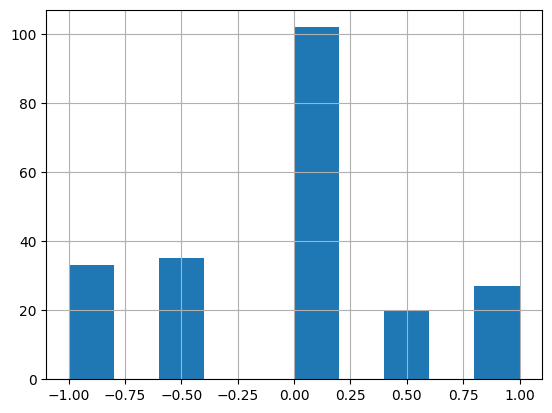

In [17]:
stored_test_set['true_sentiment'].hist()

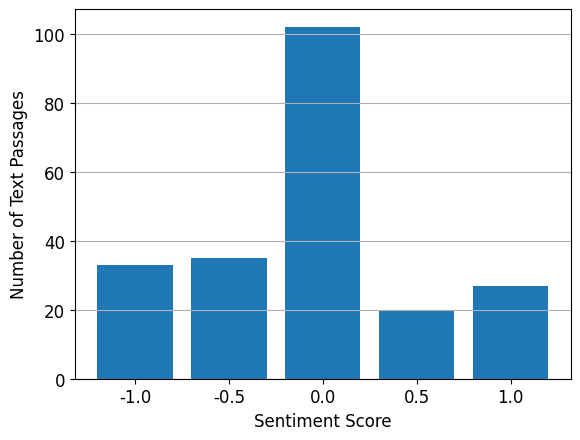

In [35]:
categories, counts = np.unique(stored_test_set['true_sentiment'].astype(float).tolist(), return_counts=True)
categories = categories.astype(str)

plt.rcParams.update({'font.size': 12})

plt.bar(categories, counts)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Text Passages")
plt.grid(axis = 'y')
plt.show()

In [31]:
categories

'[-1.  -0.5  0.   0.5  1. ]'

In [29]:
np.unique(stored_test_set['true_sentiment'].astype(float).tolist(), return_counts=True)

(array([-1. , -0.5,  0. ,  0.5,  1. ]), array([ 33,  35, 102,  20,  27]))

In [ ]:
stored_test_set.info()

In [ ]:
g = stored_test_set.groupby('true_sentiment')
balanced_test_set = g.apply(lambda x: x.sample(g.size().min())).droplevel('true_sentiment')

In [ ]:
balanced_test_set

In [ ]:
balanced_test_set.to_pickle('gdrive/MyDrive/mathesis/sent_testset_balanced_2018.pkl')